# Absorption Spectrum Simulator

### Utsav KC

This code generates the absorption spectrum of a mixture of methane and water. Methane is an important molecule in the Earth as well as the Martian atmosphere. An increase in the concentration of methane in the Earth's atmosphere can accelerate the global warming as methane can even absorb some of the infrared bands for which the water and carbon dioxide are transparent. In the Martian atmosphere, the presence of methane may indicate the existence of life. The simulation of an absorption spectrum is required to interpret the absorption signal.
<br>
<font color = red>
    Suggestions for improvements in the future versions are stated in red.
    </font>

In [1]:
totalP=1
#total pressure on the planet in units of atm

AmbTemp=15+273
#temperature of the system in Kelvin

path=100
#total path length in cm

xmeth=1800E-9
#mole fraction of methane 1800 ppb

xwat=0.025 
#mole fraction of water

In [2]:
import numpy as np
from scipy.special import wofz
#wofz is used to compute Voigt function

import matplotlib.pyplot as mpl

waveaxis=np.arange(3066,3068,0.01)
#wavelength in units of cm-1

dimx=len(waveaxis) #number of wavelength values

<font color = red>
    User input to be collected in a GUI in the next version.
    <br>
    Additional input options to be included in the next version.
    </font>

In [3]:
H=6.62606957E-34
#Plack's constant in Js

C=2.99792458E10
#speed of light in cms-1

HC=H*C 
#value of hc in J.cm

K=1.3806488E-23 
#value of Boltzmann constant in JK^-1

hck=HC/K 
#this factor appears many times in the expression for line strength

fac=2.4797E19 
#factor to convert from S* to S

TNOT=296 
#Reference temperature

In [4]:
MMETH=16.04
#molar mass of methane (g/mol)

MWAT=18.010565
#molar mass of water (g/mol)

In [5]:
QTNOT=590.4780
#partition function of methane at 296 K

QTNOTW=174.581
#partition function of water at 296 K

In [6]:
def partf(filename,temp):
    qdata = np.genfromtxt(filename)
    return qdata[temp-1,1]

#function to read the file containing the values of partition functions and return the partition function at given temp

In [7]:
qt = partf('Partfun_12CH4.txt',AmbTemp)
#partition function of methane at the given temperature

qtw = partf('Partfun_H16OH.txt',AmbTemp)
#partition function of water at the given temperature


## Partition Functions
The partition functions are dowloaded from the following source: https://hitran.iao.ru/partfun 

In [8]:
#Extraction of methane parameters
#obtain the molecular parameters of methane taken from the HITRAN database
print('reading CH4 molecular parameters...')
parmdata=np.genfromtxt('Mars-parmsHIT12.txt') #partmsHIT12.txt contains the new version of methane data
delpnu=totalP*1.0*parmdata[:,9] #pressure shift
vacnu=parmdata[:,2]
CF=delpnu+vacnu
#vector containing all the center frequency i.e transition wavelengths
#the first term accounts for line shift because of interactions with air
#contribution to line shift from water and methane have been neglected
sstarcorrection=(1-2*delpnu/vacnu)*(1-np.exp(-hck*vacnu/AmbTemp)*(1-hck*delpnu/AmbTemp))/(1-np.exp(-hck*vacnu/AmbTemp))
SASTRIX=parmdata[:,3]*sstarcorrection#vector containing all the S*
LOWSTATE=parmdata[:,7]#vector contaning all the lower state energy
colwmeth=parmdata[:,5]*1*totalP#collisional air-broadening coefficients
temexpmeth=parmdata[:,8]#exponent of temperature dependence

reading CH4 molecular parameters...


## HITRAN output
<font color = blue>

The HITRAN output was saved as an excel file to separate the columns. The excel sheet was again saved as a text file. The column wise description of the output data from HITRAN is available here https://youtu.be/1FLHRhmTx-w 

</font>

<br>


<font color = red>
    
In the next version, this must be improved by writing the code to read the required parameters directly from the HITRAN output file. 

<br>
Another improvement would be to write a function which will extract the relevant molecular parameters for chosen list of molecules.

</font>


## $S^{*}$

The $S^{*}$ is the spectral line intensity between two rovibronic states in units of $cm^{-1}/(molecule.cm^{-2})$ as listed in the HITRAN database. It is listed in column 3 of the file containing molecular data. It is given by
$$ S_{ij}^{*} = I_{a}\frac{A_{ij}}{8\pi c\nu^{2}_{ij}}\frac{g'e^{-c_{2}E"/T(1-e^{-c_{2}\nu_{ij}/T})}}{Q(T)} $$
Ref: https://hitran.org/docs/definitions-and-units/ 

This equation was adjusted for the line shift by substituting $\nu_{ij}$ by $\nu_{ij} + \Delta\nu$. Assuming that $\Delta\nu/\nu_{ij} << 1$, the $S_{ij}^{*}$ given in HITRAN is multiplied by a correction factor which is
$$ \left(1-\frac{2\Delta\nu}{\nu_{ij}}\right)\left[\frac{1-e^{-c_{2}\nu_{ij}/T}(1-c_{2}\Delta\nu/T)}{1-e^{-c_{2}\nu_{ij}/T}}\right]$$

## Pressure Shift
<font color = blue>
Air induced pressure shifts are listed in column 9 of the molecular data file. Their values are in units of $cm^{-1}/atm$ (at $T_{ref} = 296 K$) so they are multipled by the total pressure. The pressure shift is entirely attributed to air, which is not accurate. A greater accuracy in pressure shift is obtained using
$$ \Delta\nu = P\sum_{a}X_{a}\delta_{A}(T_{ref}/T)^{M} $$
Here, $P$ is the total pressure, $a$ is the molecular species, $X_{a}$ is the mole fraction of $a$, $\delta_{a}$ is the shift induced by species $a$, and $T$ is the temperature of the sample. The temperature exponent, $M$ for the pressure shifts are not provided in the molecular data files by HITRAN. 
</font>

<br>
<br>

<font color = red>
This may be improved in the next version of the code if the data is available. The shift induced by a given species should be weighted by their partial pressures.
</font>



In [9]:
#Extraction of water parameters
#obtain the H2O data
print('reading H2O molecular parameters...')
waterdata=np.genfromtxt('H2Oparms.txt')#H2Oparms.txt contains molecular parameters from HITRAN
wdelpnu=totalP*1.0*waterdata[:,9]#pressure shift
#wdelpnu=0
wvacnu=waterdata[:,2]#vacuum wavenumber
CFW=wdelpnu+wvacnu
#vector containing all the center frequency i.e transition wavelengths
#the first term accounts for line shift because of interactions with air
#contribution to line shift from water and methane have been neglected

wstcorr=(1-2*wdelpnu/wvacnu)*(1-np.exp(-hck*wvacnu/AmbTemp)*(1-hck*wdelpnu/AmbTemp))/(1-np.exp(-hck*wvacnu/AmbTemp))
SASTRIXW=waterdata[:,3]*wstcorr#values of S*
LOWSTATEW=waterdata[:,7]#lower state energy
colwwat=waterdata[:,5]*totalP#collisional air-broadening coefficients
temexpwat=waterdata[:,8]#exponent of temperature dependence

reading H2O molecular parameters...


In [10]:
def intense(stars,partinot,parti,lower,cent):
#vector containing all the line strengths at T calculated from s*
    return fac*(TNOT/AmbTemp)*stars*(partinot/parti)*np.exp(-hck*lower*((1.0/AmbTemp)-(1.0/TNOT)))\
            *(1-np.exp(-hck*cent/AmbTemp))/(1-np.exp(-hck*cent/TNOT))


## Line Strength or Spectral Line Intensity

The equation for line strength is given by
$$ S_{i} \left[cm^{-2}atm^{-1}\right] = S_{i}(T_{0})\frac{Q(T_{0})}{Q(T)}\left(\frac{T_{0}}{T}\right)exp\left[-\frac{hcE_{i}^{"}}{k}\left(\frac{1}{T}-\frac{1}{T_{0}}\right)\right]\times \left[1-exp\left(\frac{-hc\nu_{0,i}}{kT}\right)\right]\left[1-exp\left(\frac{-hc\nu_{0,i}}{kT_{0}}\right)\right]^{-1}$$

Since, 

$$ S(T_{0}) = S^{*}(T_0) \times 2.4797 \times 10^{19} $$

We get the following expression for the line strength which also accounts for the shift in the line center.

$$ S_{i} \left[cm^{-2}atm^{-1}\right] = S^{*}(T_0) \times 2.4797 \times 10^{19} \times \frac{Q(T_{0})}{Q(T)}\left(\frac{T_{0}}{T}\right)exp\left[-\frac{hcE_{i}^{"}}{k}\left(\frac{1}{T}-\frac{1}{T_{0}}\right)\right]\times \left[1-exp\left(\frac{-hc(\nu_{0,i}+\Delta\nu)}{kT}\right)\right]\left[1-exp\left(\frac{-hc(\nu_{0,i}+\Delta\nu)}{kT_{0}}\right)\right]^{-1}$$


In [11]:
#line strengths of methane
tns=intense(SASTRIX,QTNOT,qt,LOWSTATE,CF)
#line strengths of water
tnsw=intense(SASTRIXW,QTNOTW,qtw,LOWSTATEW,CFW)

In [12]:
def V(xx, alpha, gamma):
    """
    Return the Voigt line shape at xx with Lorentzian component HWHM gamma
    and Gaussian component HWHM alpha.

    """
    sigma = alpha/np.sqrt(2 * np.log(2)) #standard deviation of a normal distribution function
    zz = (xx + 1j*gamma)/(np.sqrt(2)*sigma) #argument of the Fadeeva function (wofz)
    return np.real(wofz(zz))/(sigma*np.sqrt(2*np.pi))   

## Voigt and Fadeeva Function (wofz)

The function for the Voigt profile is described in https://scipy.github.io/devdocs/generated/scipy.special.voigt_profile.html

<font color = red>
 In the next version of the code, use the voigt_profile function
 </font>
 <br>
 The Voigt function is related to the Fadeeva function as follows
 $$V(x;\sigma, \gamma) = \frac{Re\left[w\left(\frac{x+i\gamma}{\sqrt{2}\sigma}\right)\right]}{\sigma\sqrt{2\pi}}$$
 Here $\sigma$ is the standard deviation of the normal distribution. The normal distribution of $x$ is given by
 $$ f(x) = \frac{1}{\sigma 2\pi}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}$$
 The HWHM is $\sigma\sqrt{2\ln2}$ so the HWHM should be divided by $\sqrt{2\ln2}$ to obtain the standard deviation, $\sigma$.
 

In [13]:
"""Calculation of the line shape function from each center wavelength"""
#the following loop calculates the line shape function at each center frequency

def shapecont(cenfreq,molmass,width,expo):
    p=0
    lsvalue=np.zeros((dimx,len(cenfreq)))
    for center in cenfreq:
        dopwid=0.5*center*(7.1623e-7)*np.sqrt(AmbTemp/molmass)#doppler half width
        tex=expo[p]
        lorwid=0.5*totalP*2*width[p]*(TNOT/AmbTemp)**tex#lorentz half width
        wav=waveaxis-center
        lsvalue[:,p]=V(wav,dopwid,lorwid)
        p=p+1
        
    return lsvalue

## Line Broadening
The Doppler FWHM is given by 
$$ \Delta\nu_{D} = \nu_{0}\left(\frac{8kT\ln2}{mc^{2}}\right)^\frac{1}{2}$$
or
$$ \Delta\nu_{D} = \nu_{0}\left(7.1623 \times 10^{-7}\right)\left(\frac{T}{M}\right)^{\frac{1}{2}}$$

Here $M$ is the molar mass [g/mol]. 
<br>
<br>
The collisional FWHM for species $B$ because of species $A$'s is given by 
$$\Delta\nu_{C} = P\sum_{A}X_{A}2\gamma_{B-A}$$
<br>
Here,
$$\gamma(T) = \gamma\left(T_{0}\right)\left(\frac{T_{0}}{T}\right)^{N}$$

<font color = red>
In the current version of the code, only the collisional broadening by air is accounted. In the next version, the self-broadening and that by other non-air species may also be included.
 </font>

In [14]:
print('line shape calculation in progress...')
phivmeth=shapecont(CF,MMETH,colwmeth,temexpmeth)#lineshape from each center frequency in methane    
phivwat=shapecont(CFW,MWAT,colwwat,temexpwat)#lineshape from each center frequency in water
print('end of line shape calculation.')  

line shape calculation in progress...
end of line shape calculation.


In [15]:
#calculation of absorbance for a molecular species given the line intensity, linshape and X
def absorbance(transtr,lsfunc,nmol):
    linabs=np.zeros((dimx,len(transtr)))
    p=0
    for st in transtr:
        linabs[:,p]=st*lsfunc[:,p]*nmol*totalP*path
        p=p+1
    return linabs.sum(axis=1)

In [16]:
#calculation of total absorbance from water and methane
def absprof(xaxis,molm,molw):
    return absorbance(tns,phivmeth,molm) + absorbance(tnsw,phivwat,molw)

data figure in progress...
Writing the files with results!


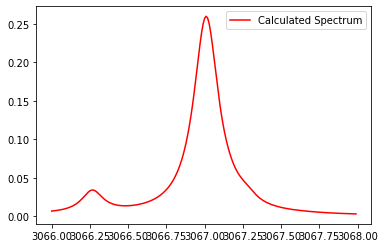

In [17]:
# Plot the result
fig = mpl.figure()
ax = fig.add_subplot(111)

print('data figure in progress...')
ym=absprof(waveaxis,xmeth,xwat)
ax.plot(waveaxis, ym, c='r', label='Calculated Spectrum')
ax.legend()
fig.savefig('Calculated Spectrum.png')

print('Writing the files with results!')